In [1]:
from kacper.project import functions as kd
import pandas as pd

## First step is to download data on bus movement. I chose here to download data from 10min on bus movement in Warsaw. The resulting file are saved in 'test.csv' file.

In [2]:
%%time
kd.download_bus_data(10, outfilename='test_bus.csv')

Minutes until downloading data is completed: 10
Minutes until downloading data is completed: 9
Minutes until downloading data is completed: 8
Minutes until downloading data is completed: 7
Minutes until downloading data is completed: 6
Minutes until downloading data is completed: 5
Minutes until downloading data is completed: 4
Minutes until downloading data is completed: 3
Minutes until downloading data is completed: 2
Minutes until downloading data is completed: 1
CPU times: user 643 ms, sys: 54.7 ms, total: 698 ms
Wall time: 10min 5s


## Now it is time to catch speeding bus drivers!

In [3]:
%%time
speeding_df = kd.speeding('test_bus.csv', 50, from_file=True)

CPU times: user 6.08 s, sys: 107 ms, total: 6.19 s
Wall time: 5.57 s


## Now we map the data on speeding buses on the map of Warsaw. The mapping function is universal - you just need a picture of the map and coordinates of it's edges.

CPU times: user 1.74 s, sys: 39.2 ms, total: 1.78 s
Wall time: 718 ms


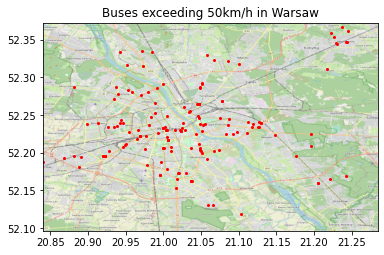

In [4]:
%%time
kd.map_points(speeding_df, 'warsaw_map.png', (20.8404, 21.2846, 52.0964, 52.3727), 'speeders.png')

## Downloading data on bus stops

In [5]:
%%time
df_bus_stops = kd.download_bus_stops()

CPU times: user 535 ms, sys: 50.1 ms, total: 585 ms
Wall time: 3.4 s


## Now for each bust stop I'm adding bus lines with their schedule

In [9]:
%%time
df_of_schedule = kd.add_bus_lines(df_bus_stops)

CPU times: user 23.7 s, sys: 7.85 s, total: 31.5 s
Wall time: 1h 8min 41s


## Now we check the buses punctality. The results are printed in a form of a dict with 2 keys: punctual and late.

In [10]:
%%time
df_bus_data = pd.read_csv('test_bus.csv', index_col=0)
punctuality = kd.late_buses(df_bus_data, df_of_schedule)

CPU times: user 58min 36s, sys: 42.9 s, total: 59min 19s
Wall time: 55min 55s


In [17]:
print(f"Example late buses: {punctuality['late'][:10]}, number of late buses found: {len(punctuality['late'])}")

Example late buses: [('123', '4', '12:54:00', '4.48min', '1.1312065410483223km'), ('123', '4', '12:54:00', '5.62min', '1.3263840066002348km'), ('138', '1', '12:50:00', '2.4min', '1.0619959702253456km'), ('138', '1', '12:50:00', '3.57min', '1.47586387797725km'), ('138', '1', '12:50:00', '4.48min', '1.6896991997544712km'), ('138', '1', '12:50:00', '5.4min', '2.022727416759237km'), ('147', '4', '12:56:00', '4.5min', '1.2343693701969778km'), ('147', '4', '12:56:00', '3.67min', '1.2504241807094678km'), ('166', '3', '12:55:00', '3.57min', '1.3895480490340342km'), ('166', '3', '12:55:00', '2.65min', '1.313386456649009km')], number of late buses found: 28064


In [20]:
print(f"Punctual buses: {punctuality['punctual'][:10]},  number of punctual buses found: {len(punctuality['punctual'])}")

Punctual buses: [('123', '4', '12:54:00', '2.42min', '0.9177545651029959km'), ('123', '4', '12:54:00', '1.48min', '0.6179502838033151km'), ('123', '4', '12:54:00', '0.37min', '0.23538785146643862km'), ('123', '4', '12:54:00', '0.53min', '0.10463118096886383km'), ('123', '4', '12:54:00', '1.52min', '0.05595960798289995km'), ('123', '4', '12:54:00', '2.6min', '0.1690993305416638km'), ('123', '4', '12:54:00', '3.58min', '0.7185465077478849km'), ('125', '3', '12:49:00', '2.47min', '0.01875589016526885km'), ('125', '3', '12:49:00', '3.37min', '0.05974831788817682km'), ('125', '3', '12:49:00', '4.43min', '0.2865943534578108km')],  number of punctual buses found: 38509
